#Single-stage detection networks

Spre deosebire de o re»õea two-stage, √Æn care √ÆmpƒÉr»õirea imaginii de input √Æn regiuni reprezintƒÉ un pas separat al inferen»õei, o re»õea de detec»õie single-stage realizeazƒÉ simultan task-urile de √ÆmpƒÉr»õire √Æn regiuni, de clasificare »ôi de localizare a obiectelor din imagine.

**Avantaj:** detec»õie rapidƒÉ, potrivitƒÉ pentru inferen»õƒÉ √Æn timp real.

**Dezavantaj:** precizia poate fi mai scƒÉzutƒÉ la obiecte mici sau √Æn scene complexe.

---

###**YOLO** (You only look once)

YOLO proceseazƒÉ imaginea √ÆmpƒÉr»õind-o √Æntr-o grilƒÉ de dimensiune fixƒÉ. Pentru fiecare celulƒÉ din grilƒÉ, re»õeaua prezice probabilitƒÉ»õile claselor »ôi un set prestabilit de bounding boxes, fiecare √Ænso»õit de un scor de √Æncredere. √én consecin»õƒÉ, predic»õia asociatƒÉ unei celule are forma:

$$
(x_1, y_1, w_1, h_1, C_1, \; x_2, y_2, w_2, h_2, C_2, \; \dots, \; x_B, y_B, w_B, h_B, C_B, \; p(c_1), p(c_2), \dots, p(c_C))
$$

unde:
- $ (x_i, y_i) $ ‚Äî coordonatele centrului box-ului relativ la celulƒÉ,
- $ (w_i, h_i) $ ‚Äî lƒÉ»õimea »ôi √ÆnƒÉl»õimea box-ului (raportate la √Æntreaga imagine),
- $ C_i $ ‚Äî scorul de **√Æncredere** pentru box-ul $i$,
- $ p(c_j) $ ‚Äî probabilitatea apari»õiei clasei $c_j$ dacƒÉ √Æn celulƒÉ existƒÉ un obiect.


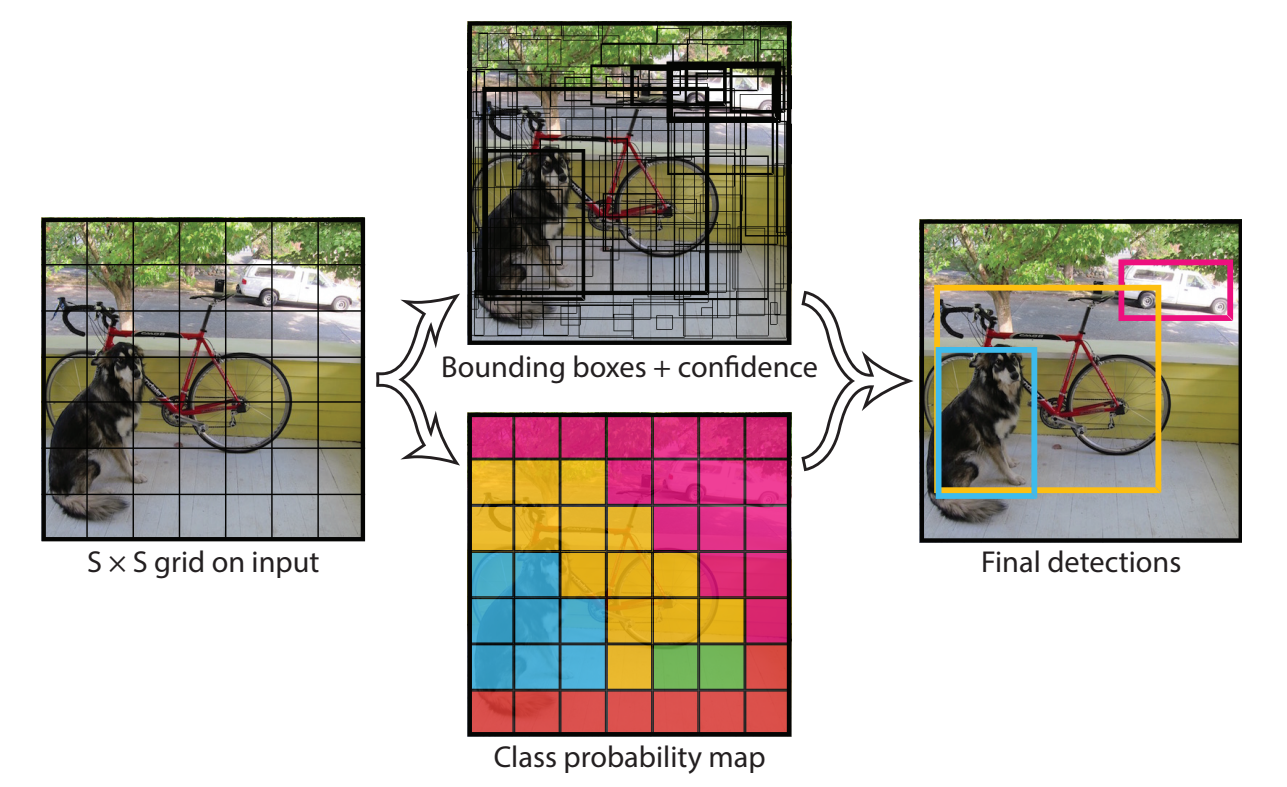




### Arhitectura YOLO

Modelul constƒÉ din:
*   24 de straturi convolu»õionale, pentru extragerea caracteristicilor vizuale
*   2 straturi complet conectate (fully connected), care transformƒÉ aceste caracteristici √Æn predic»õii de bounding boxes »ôi clase.

Func»õiile de activare folosite sunt Leaky ReLU, iar normalizarea se face prin batch normalization pentru stabilitatea antrenƒÉrii.
Ultimul strat folose»ôte o activare linearƒÉ, deoarece trebuie sƒÉ producƒÉ valori continue pentru coordonate »ôi scoruri.

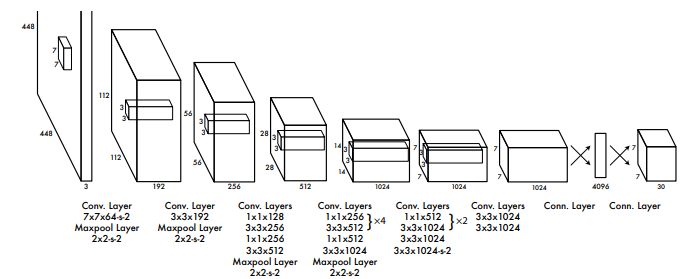

###Loss function
  
Loss function-ul YOLO combinƒÉ trei componente: localizare, √Æncredere »ôi clasificare:

$$
\
L = \lambda_{coord} L_{coord} + L_{conf} + L_{class}
\
$$

unde:


- $L_{coord}$ ‚Äî eroarea de **localizare** (pentru pozi»õia »ôi dimensiunea box-urilor),
- $L_{conf}$ ‚Äî eroarea de **√Æncredere** (confidence score),
- $L_{class}$ ‚Äî eroarea de **clasificare** (tipul obiectului).

#### **Eroarea de localizare**

AceastƒÉ parte mƒÉsoarƒÉ c√¢t de bine sunt prezise pozi»õiile »ôi dimensiunile obiectelor.

$$
L_{coord} =
\sum_{i=0}^{S^2}\sum_{j=0}^{B}
\mathbb{1}_{ij}^{obj}
\Big[
(x_i - \hat{x}_i)^2 +
(y_i - \hat{y}_i)^2 +
(\sqrt{w_i} - \sqrt{\hat{w}_i})^2 +
(\sqrt{h_i} - \sqrt{\hat{h}_i})^2
\Big]
$$

Explica»õii:
- $\mathbb{1}_{ij}^{obj} = 1$ dacƒÉ obiectul este detectat de box-ul *j* din celula *i*.
- Se folose»ôte rƒÉdƒÉcina pƒÉtratƒÉ pentru $w$ »ôi $h$ pentru a reduce efectul obiectelor mari.
- $\lambda_{coord} = 5$ dƒÉ o importan»õƒÉ mai mare coordonatelor.

#### **Eroarea de √Æncredere (Confidence Loss)**

YOLO prezice pentru fiecare box un **scor de √Æncredere**:

$$
\text{Confidence} = \text{Pr(object)} \times \text{IoU(pred, truth)}
$$

Func»õia de pierdere pentru √Æncredere este:

$$
L_{conf} =
\sum_{i=0}^{S^2}\sum_{j=0}^{B}
\Big[
\mathbb{1}_{ij}^{obj} (C_i - \hat{C}_i)^2 +
\lambda_{noobj} \mathbb{1}_{ij}^{noobj} (C_i - \hat{C}_i)^2
\Big]
$$

unde:
- $\lambda_{noobj} = 0.5$ reduce penalizarea pentru box-urile fƒÉrƒÉ obiecte.
- Acest termen √Ænva»õƒÉ modelul **unde sƒÉ fie sigur** »ôi **unde sƒÉ fie rezervat**.

#### **Eroarea de clasificare**

√én fiecare celulƒÉ care con»õine un obiect, YOLO prezice un vector de probabilitƒÉ»õi pentru clase.

$$
L_{class} =
\sum_{i=0}^{S^2}
\mathbb{1}_{i}^{obj}
\sum_{c=1}^{C}
(p_i(c) - \hat{p}_i(c))^2
$$

unde:
- $p_i(c)$ = eticheta realƒÉ (1 pentru clasa corectƒÉ, 0 altfel),
- $\hat{p}_i(c)$ = probabilitatea prezisƒÉ de model.

AceastƒÉ parte √Æl √Ænva»õƒÉ **ce fel de obiect** se aflƒÉ √Æntr-o celulƒÉ.

---

### Evolu»õia modelului YOLO

YOLOv1 a fost revolu»õionar pentru cƒÉ a tratat detec»õia de obiecte ca o singurƒÉ problemƒÉ de regresie. Totu»ôi, modelul era destul de imprecis pentru obiectele mici sau apropiate.

#### Introducerea ancorelor »ôi detectƒÉrii multi-scale
Primele upgrade-uri au adƒÉugat:
- **Anchor boxes:** √ÆnvƒÉ»õarea formelor »ôi dimensiunilor tipice ale obiectelor.  
- **Feature pyramids:** detec»õie la mai multe scale, pentru a recunoa»ôte obiecte mici, mari »ôi medii.

Aceste modificƒÉri au crescut considerabil acurate»õea »ôi flexibilitatea modelului.

#### Backbone-uri mai puternice »ôi normalizare mai bunƒÉ
- √én timp, YOLO a trecut de la arhitecturi simple (precum GoogLeNet) la re»õele avansate: Darknet-19 / 53, apoi CSPDarknet, »ôi mai recent EfficientBackbone. Acestea au √ÆmbunƒÉtƒÉ»õit semnificativ capacitatea de extragere a caracteristicilor vizuale.
- TotodatƒÉ, s-au adƒÉugat tehnici precum Batch Normalization, LeakyReLU, »ôi residual connections, care stabilizeazƒÉ antrenarea.

#### De la YOLO clasic la modele moderne
√éncep√¢nd cu YOLOv5‚ÄìYOLOv8, modelele au fost complet rescrise √Æn **PyTorch**, devenind:
- mai rapide,
- mai u»ôor de antrenat pe GPU,
- mai compatibile cu formate moderne (ONNX, TensorRT etc.)

#### YOLOv10‚ÄìYOLOv11: eficien»õƒÉ maximƒÉ »ôi precizie ridicatƒÉ
Versiunile recente au adus:
- Non-max supression (NMS) √ÆmbunƒÉtƒÉ»õit »ôi algoritmi fƒÉrƒÉ NMS (mai stabili la obiecte apropiate).  
- Suport pentru detec»õie, segmentare, tracking »ôi clasificare √Æntr-un singur framework.
- Optimizare pentru dispozitive edge (mobil, Jetson, etc.), cu modele mai mici »ôi rapide (ex: YOLOv11n).

---


### Demo code (fine-tune »ôi inferen»õƒÉ)

Pachetul **ultralytics** con»õine implementƒÉri pentru multiple versiuni de YOLO.

In [ ]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 25.0 MB/s eta 0:00:00


√én aces demo vom folosi dataset-ul **Oxford-IIIT-Pet**.

In [ ]:
from torchvision.datasets import OxfordIIITPet

dataset = OxfordIIITPet(root="data", download=True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 792M/792M [00:34<00:00, 22.8MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.2M/19.2M [00:01<00:00, 12.0MB/s]


Pentru a folosi dataset-ul √Æn antrenarea modelului, e nevoie de convertirea formatului bounding box-urilor »ôi crearea unei configura»õii .yaml

In [ ]:
import os
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from PIL import Image

DATASET_DIR = "data/oxford-iiit-pet"
IMAGES_DIR = os.path.join(DATASET_DIR, "images")
ANNOTATIONS_DIR = os.path.join(DATASET_DIR, "annotations/xmls")

YOLO_IMAGES_DIR = os.path.join(DATASET_DIR, "images")
YOLO_LABELS_DIR = os.path.join(DATASET_DIR, "labels")

VAL_SPLIT = 0.2
SEED = 42

image_files = [f.split(".")[0] for f in os.listdir(ANNOTATIONS_DIR) if f.endswith(".xml")]

train_files, val_files = train_test_split(image_files, test_size=VAL_SPLIT, random_state=SEED)

def convert_box(size, box):
    """Convert (xmin, xmax, ymin, ymax) box to YOLO format (x_center, y_center, w, h)."""
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def process_files(files, split):
    out_img_dir = os.path.join(YOLO_IMAGES_DIR, split)
    out_lbl_dir = os.path.join(YOLO_LABELS_DIR, split)

    os.makedirs(out_img_dir, exist_ok=True)
    os.makedirs(out_lbl_dir, exist_ok=True)

    for name in files:
        xml_path = os.path.join(ANNOTATIONS_DIR, name + ".xml")
        img_path = os.path.join(IMAGES_DIR, name + ".jpg")
        out_img_path = os.path.join(out_img_dir, name + ".jpg")
        out_lbl_path = os.path.join(out_lbl_dir, name + ".txt")

        if not os.path.exists(xml_path) or not os.path.exists(img_path):
            continue

        if not os.path.exists(out_img_path):
            os.system(f"cp '{img_path}' '{out_img_path}'")

        tree = ET.parse(xml_path)
        root = tree.getroot()

        size = root.find("size")
        w = int(size.find("width").text)
        h = int(size.find("height").text)

        with open(out_lbl_path, "w") as f:
            for obj in root.iter("object"):
                cls = obj.find("name").text.lower().strip()

                cls_id = CLASSES.index(cls)

                xmlbox = obj.find("bndbox")
                b = (int(xmlbox.find("xmin").text), int(xmlbox.find("xmax").text),
                     int(xmlbox.find("ymin").text), int(xmlbox.find("ymax").text))
                bb = convert_box((w, h), b)
                f.write(f"{cls_id} " + " ".join([f"{a:.6f}" for a in bb]) + "\n")

CLASSES = []
for xml_file in os.listdir(ANNOTATIONS_DIR):
    if not xml_file.endswith(".xml"):
        continue
    tree = ET.parse(os.path.join(ANNOTATIONS_DIR, xml_file))
    root = tree.getroot()
    for obj in root.iter("object"):
        cls = obj.find("name").text.lower().strip()
        if cls not in CLASSES:
            CLASSES.append(cls)

CLASSES = sorted(CLASSES)
print(f"Found {len(CLASSES)} classes.")

process_files(train_files, "train")
process_files(val_files, "val")

yaml_path = os.path.join(DATASET_DIR, "oxford-iiit.yaml")
with open(yaml_path, "w") as f:
    f.write("path: " + DATASET_DIR + "\n")
    f.write("train: images/train\n")
    f.write("val: images/val\n")
    f.write("names:\n")
    for i, clss in enumerate(CLASSES):
        f.write(f"  {i}: {clss}\n")

print("Dataset ready for YOLOv11.")


Found 2 classes.
Dataset ready for YOLOv11.


Demo-ul va fi fƒÉcut folosind varianta YOLOv11n (nano). UrmeazƒÉ ini»õializarea modelului cu weight-uri pretrained. Vom face fine-tune pe dataset-ul pe care l-am descƒÉrcat »ôi pregƒÉtit.

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

results = model.train(data=yaml_path, epochs=10)

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.206 üöÄ Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/oxford-iiit-pet/oxford-iiit.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, io

√én urma antrenƒÉrii a fost creat un fi»ôier .pt, ce con»õine weight-urile ob»õinute prin fine-tuning.

In [ ]:
WEIGTHS_FILE = "runs/detect/train/weights/best.pt"

model = YOLO(WEIGTHS_FILE)

Acum putem rula inferen»õe cu modelul fine-tuned.


image 1/1 /content/data/oxford-iiit-pet/images/american_bulldog_169.jpg: 448x640 1 dog, 80.4ms
Speed: 3.6ms preprocess, 80.4ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


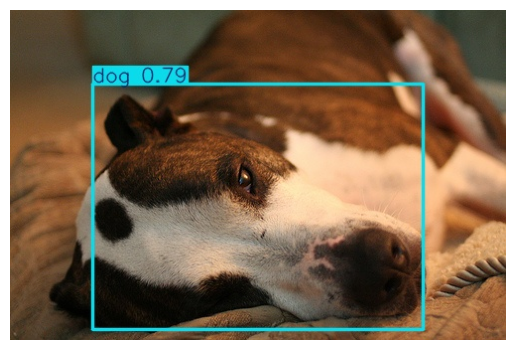

In [ ]:
import matplotlib.pyplot as plt

IMG_FILE = "american_bulldog_169.jpg"

results = model(os.path.join(IMAGES_DIR, IMG_FILE))

results[0].save(filename="output.jpg")

img = plt.imread("output.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

Codul de mai jos este o varianta "manualƒÉ" de control a rezultatului, acces√¢nd direct bounding box-urile »ôi clasele prezise, dar »ôi av√¢nd op»õiunea de a modifica threshold-uri.

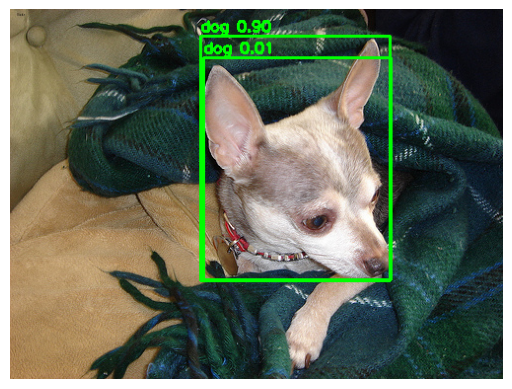

In [ ]:
from torchvision.ops import nms
import cv2

IMG_FILE = "chihuahua_25.jpg"

results = model(os.path.join(IMAGES_DIR, IMG_FILE), conf=0.01, iou=0.95, stream=False, verbose=False)

r = results[0]

# Extragem bbox-urile, confiden»õele »ôi clasele
boxes = r.boxes.xyxy  # (N, 4) [xmin, ymin, xmax, ymax]
scores = r.boxes.conf  # (N,)
classes = r.boxes.cls  # (N,)

# De aici se poate seta prelucrarea pentru non-max supression
APPLY_NMS = False
if APPLY_NMS:
    keep = nms(boxes, scores, iou_threshold=0.99999) #threshold-ul pentru supression
    boxes = boxes[keep]
    scores = scores[keep]
    classes = classes[keep]

img = cv2.imread(os.path.join(IMAGES_DIR, IMG_FILE))

for box, score, cls in zip(boxes, scores, classes):
    x1, y1, x2, y2 = box.int().tolist()
    label = f"{model.names[int(cls)]} {score:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imwrite("output_nms.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()